In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
stats = pd.read_csv('NBAstats.csv')
salary = pd.read_csv('NBASalary.csv')

In [4]:
stats = stats.rename(columns={"Unnamed: 0":"Rank"})

In [5]:
stats.head()

,Rank,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,6.1,10.2,...,0.582,4.4,8.1,12.5,3.1,1.1,1.4,2.0,2.6,14.7
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,6.6,11.8,...,0.691,2.6,8.3,10.9,5.5,1.2,1.4,3.0,2.7,17.1
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,8.0,16.3,...,0.827,2.1,5.9,8.0,2.6,0.7,1.8,1.5,2.6,20.5
3,4,Kyle Alexander\alexaky01,PF,23,MIA,2,0,13,2.8,5.5,...,NaN,5.5,2.8,8.3,0.0,0.0,0.0,2.8,2.8,5.5
4,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,6.0,16.2,...,0.676,0.5,4.6,5.1,5.4,1.0,0.5,3.3,3.5,16.3


In [6]:
# Only using 2019-2020
salary = salary.drop(columns = ['2020-21','2021-22','2022-23','2023-24','2024-25'])
salary.head()

,Rk,Player,Tm,2019-20,Signed Using,Guaranteed
0,1,Stephen Curry\curryst01,GSW,40231758,Bird Rights,"$129,019,086"
1,2,Chris Paul\paulch01,OKC,38506482,Bird Rights,"$79,865,296"
2,3,Russell Westbrook\westbru01,HOU,38178000,Bird Rights,"$123,032,000"
3,4,John Wall\walljo01,WAS,37800000,Bird Rights,"$122,472,000"
4,5,James Harden\hardeja01,HOU,37800000,Bird Rights,"$122,472,000"


In [7]:
#salary = salary.drop(columns = ["Tm"])
joint = stats.merge(salary,right_on = "Player",left_on = "Player")
joint

,Rank,Player,Pos,Age,Tm_x,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Rk,Tm_y,2019-20,Signed Using,Guaranteed
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,6.1,10.2,...,1.1,1.4,2.0,2.6,14.7,41,OKC,25842697,1st Round Pick,"$53,370,787"
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,6.6,11.8,...,1.2,1.4,3.0,2.7,17.1,253,MIA,3454080,1st Round Pick,"$8,569,572"
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,8.0,16.3,...,0.7,1.8,1.5,2.6,20.5,40,SAS,26000000,Cap Space,"$50,000,000"
3,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,6.0,16.2,...,1.0,0.5,3.3,3.5,16.3,270,NOP,2964840,1st Round Pick,"$6,078,000"
4,6,Grayson Allen\allengr01,SG,24,MEM,38,0,718,5.9,12.6,...,0.5,0.1,1.7,2.7,16.5,309,MEM,2429400,1st Round Pick,"$4,974,720"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,524,Thaddeus Young\youngth01,PF,31,CHI,64,16,1591,6.1,13.6,...,2.1,0.5,2.3,3.0,14.9,98,CHI,12900000,Cap space,"$32,445,000"
645,525,Trae Young\youngtr01,PG,21,ATL,60,60,2120,9.3,21.2,...,1.1,0.1,4.9,1.8,30.2,180,ATL,6273000,1st Round Pick,"$12,844,800"
646,526,Cody Zeller\zelleco01,C,27,CHO,58,39,1341,6.7,12.9,...,1.1,0.7,2.0,3.8,17.2,87,CHO,14471910,1st Round Pick,"$29,887,640"
647,527,Tyler Zeller\zellety01,C,30,SAS,2,0,4,9.0,36.0,...,0.0,0.0,0.0,0.0,18.0,513,SAS,245686,Minimum Salary,"$245,686"


In [8]:
joint1 = joint.dropna(subset = ["2019-20","PTS"])
joint1

,Rank,Player,Pos,Age,Tm_x,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Rk,Tm_y,2019-20,Signed Using,Guaranteed
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,6.1,10.2,...,1.1,1.4,2.0,2.6,14.7,41,OKC,25842697,1st Round Pick,"$53,370,787"
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,6.6,11.8,...,1.2,1.4,3.0,2.7,17.1,253,MIA,3454080,1st Round Pick,"$8,569,572"
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,8.0,16.3,...,0.7,1.8,1.5,2.6,20.5,40,SAS,26000000,Cap Space,"$50,000,000"
3,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,6.0,16.2,...,1.0,0.5,3.3,3.5,16.3,270,NOP,2964840,1st Round Pick,"$6,078,000"
4,6,Grayson Allen\allengr01,SG,24,MEM,38,0,718,5.9,12.6,...,0.5,0.1,1.7,2.7,16.5,309,MEM,2429400,1st Round Pick,"$4,974,720"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,524,Thaddeus Young\youngth01,PF,31,CHI,64,16,1591,6.1,13.6,...,2.1,0.5,2.3,3.0,14.9,98,CHI,12900000,Cap space,"$32,445,000"
645,525,Trae Young\youngtr01,PG,21,ATL,60,60,2120,9.3,21.2,...,1.1,0.1,4.9,1.8,30.2,180,ATL,6273000,1st Round Pick,"$12,844,800"
646,526,Cody Zeller\zelleco01,C,27,CHO,58,39,1341,6.7,12.9,...,1.1,0.7,2.0,3.8,17.2,87,CHO,14471910,1st Round Pick,"$29,887,640"
647,527,Tyler Zeller\zellety01,C,30,SAS,2,0,4,9.0,36.0,...,0.0,0.0,0.0,0.0,18.0,513,SAS,245686,Minimum Salary,"$245,686"


In [9]:
joint1["REBS"] = joint1["ORB"] + joint1["DRB"]
joint1["REBS"]

0      12.5
1      10.9
2       8.0
3       5.1
4       4.3
       ... 
644     7.1
645     4.3
646    11.0
647    36.0
648    14.7
Name: REBS, Length: 649, dtype: float64

In [14]:
np.mean(stats["Age"])

25.763440860215052

In [21]:
stats.groupby('Tm')['Age'].mean()

Tm
ATL    25.761905
BOS    24.588235
BRK    26.166667
CHI    24.176471
CHO    24.937500
CLE    24.619048
DAL    26.894737
DEN    24.761905
DET    25.454545
GSW    24.590909
HOU    28.761905
IND    24.882353
LAC    26.700000
LAL    28.100000
MEM    24.952381
MIA    26.619048
MIL    28.529412
MIN    24.541667
NOP    24.882353
NYK    24.941176
OKC    24.555556
ORL    26.000000
PHI    25.894737
PHO    24.157895
POR    25.526316
SAC    26.173913
SAS    26.333333
TOR    25.444444
TOT    26.566667
UTA    25.900000
WAS    25.260870
Name: Age, dtype: float64

[]

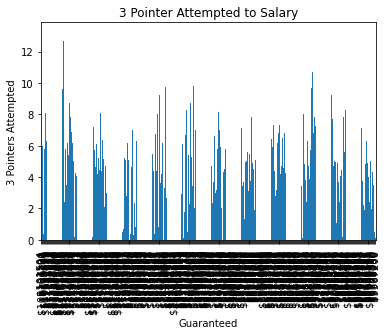

In [37]:
threePM=joint1.groupby('Guaranteed')['3PA'].mean()
graph=threePM.plot.bar()
graph.set_ylabel('3 Pointers Attempted')
graph.set_title('3 Pointer Attempted to Salary')
graph.plot()

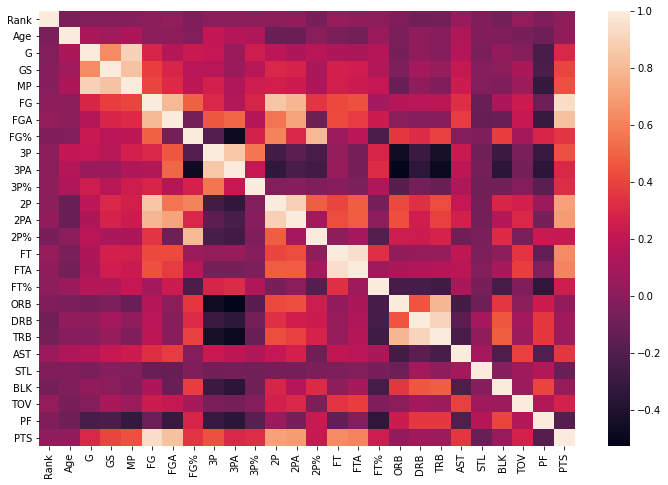

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
corr = stats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

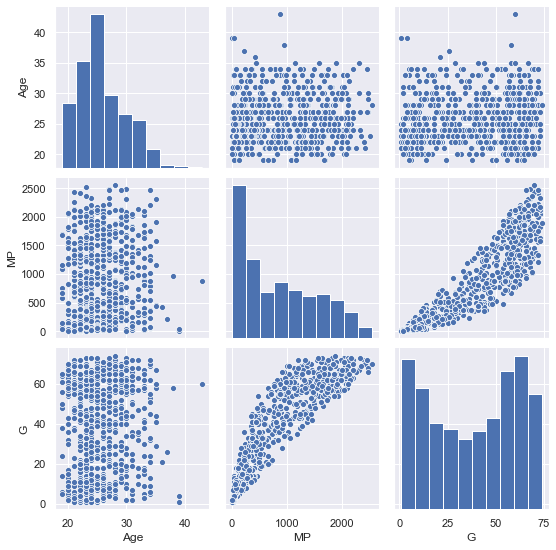

In [45]:
basic=['Pos', 'Age', 'MP', 'G']
basic_stats=stats[basic]
sns.set()
sns.pairplot(basic_stats, height=2.5)
plt.show()

In [46]:
stats["MPG"]=stats["MP"]/stats["G"]
stats["ORPG"]=stats["ORB"]/stats["G"]
stats["DRPG"]=stats["DRB"]/stats["G"]
stats["RPG"]=stats["TRB"]/stats["G"]
stats["APG"]=stats["AST"]/stats["G"]
stats["SPG"]=stats["STL"]/stats["G"]
stats["BPG"]=stats["BLK"]/stats["G"]
stats["TPG"]=stats["TOV"]/stats["G"]
stats["PFPG"]=stats["PF"]/stats["G"]
stats["PPG"]=stats["PTS"]/stats["G"]
stats["FGPG"]=stats["FG"]/stats["G"]
stats["FGAPG"]=stats["FGA"]/stats["G"]
stats["3PPG"]=stats["3P"]/stats["G"]
stats["3PAPG"]=stats["3PA"]/stats["G"]
stats["2PPG"]=stats["2P"]/stats["G"]
stats["2PAPG"]=stats["2PA"]/stats["G"]
stats["FTPG"]=stats["FT"]/stats["G"]
stats["FTAPG"]=stats["FTA"]/stats["G"]
regular=['ORPG', 'DRPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'PFPG', 'PPG', 'FGPG', 'FGAPG', '3PPG', '3PAPG', '2PPG', '2PAPG', 'FTPG', 'FTAPG']

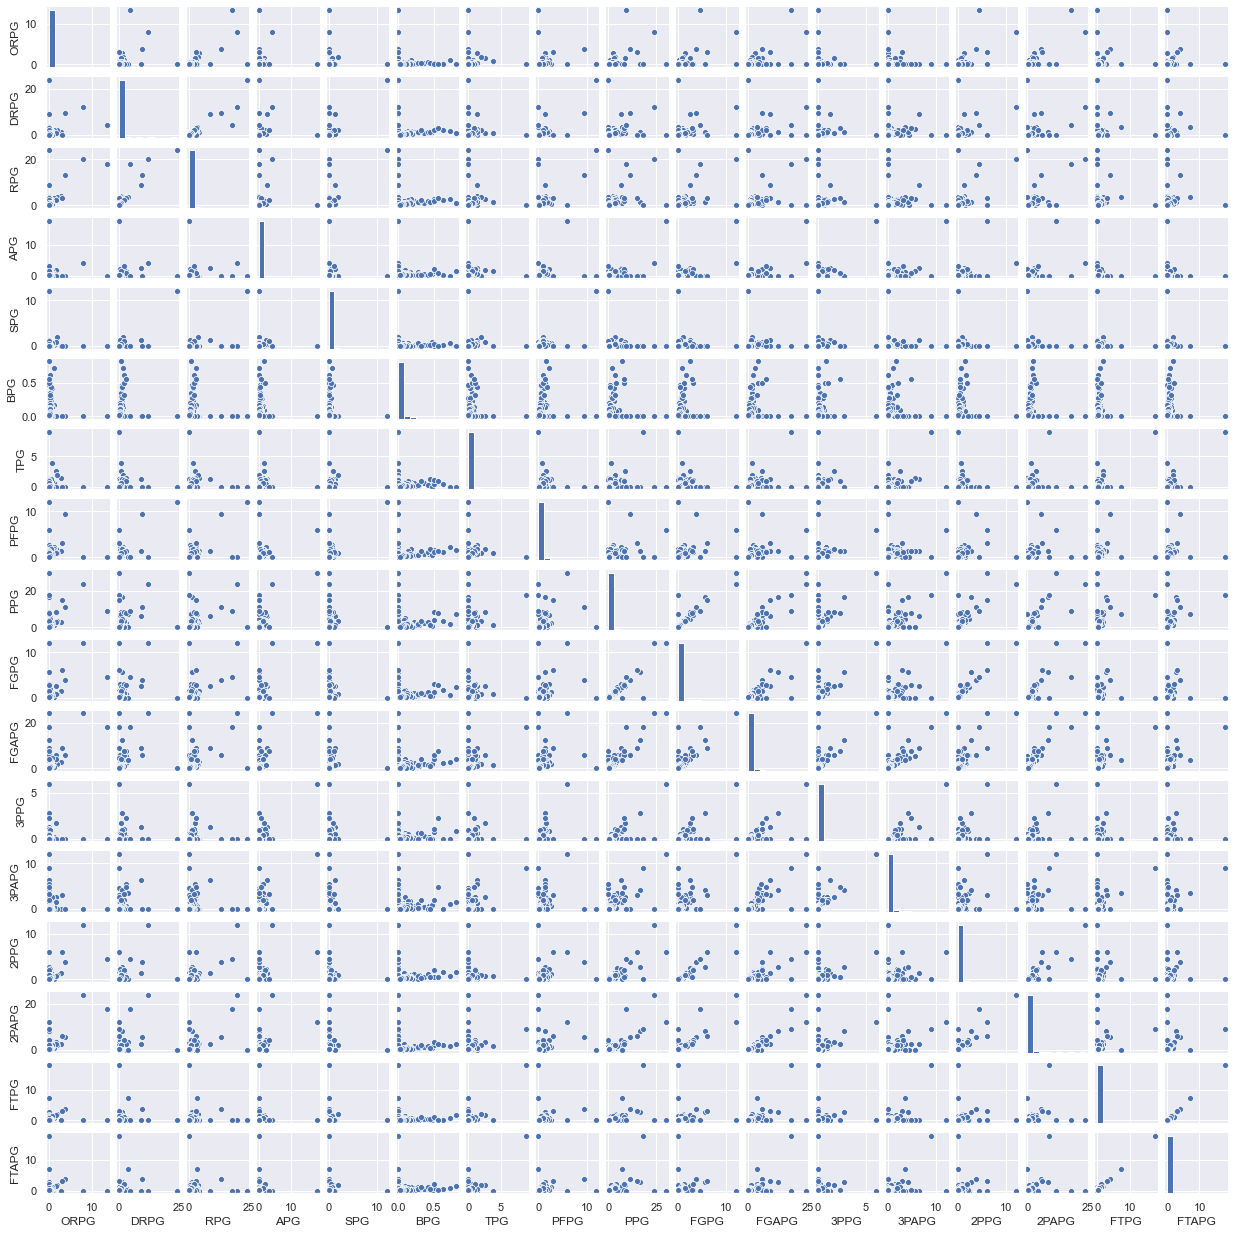

In [51]:
regular_stats=stats[regular]
sns.set()
sns.pairplot(regular_stats, height=1)
plt.show()

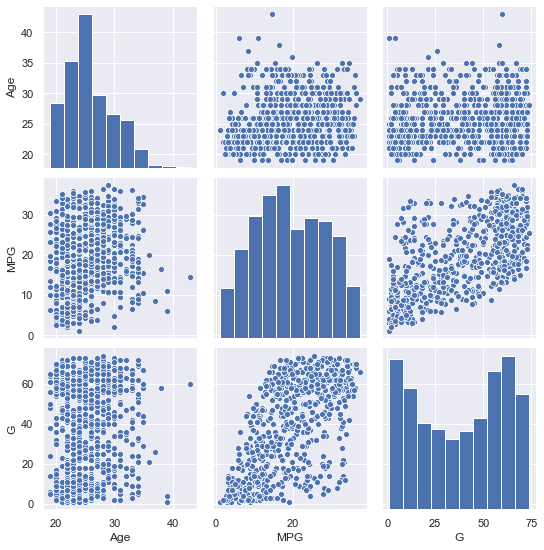

In [56]:
basic=['Pos', 'Age', 'MPG', 'G']
basic_stats=stats[basic]
sns.set()
sns.pairplot(basic_stats, height=2.5)
plt.show()

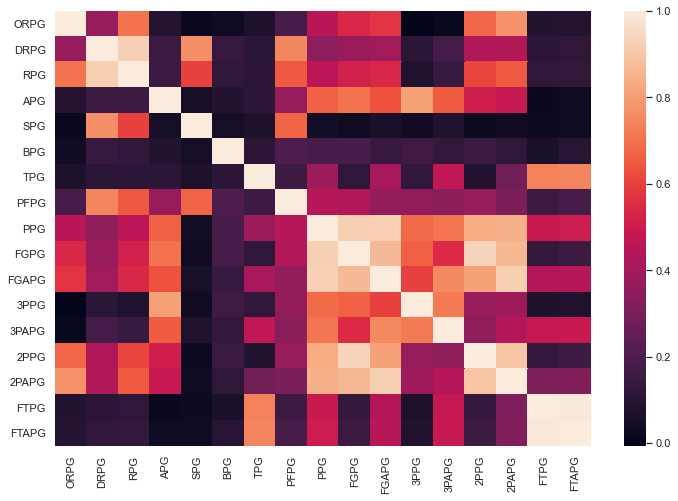

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
corr = regular_stats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)